## Práctica Titanic

Vamos a trabajar con un dataset clásico utilizado en la ciencia de datos para aprender sobre predicción y clasificación de supervivencia en el hundimiento del Titanic. 
Este archivo contiene información de los pasajeros del Titanic. Incluye detalles tanto de las características personales como del viaje, además de si sobrevivieron o no.

Aquí está una descripción de las columnas del archivo train.csv:

### Columnas del dataset:

* PassengerId:
   * Tipo: Entero
   * Descripción: Un identificador único para cada pasajero.

* Survived:
   * Tipo: Entero (0 o 1)
   * Descripción: Indicador de supervivencia.
        * 0 = No sobrevivió
        * 1 = Sobrevivió

* Pclass:
  * Tipo: Entero (1, 2, o 3)
  * Descripción: Clase de pasajero.
     * 1 = Primera clase
     * 2 = Segunda clase
     * 3 = Tercera clase

* Name:
  * Tipo: Cadena de texto
  * Descripción: Nombre del pasajero.

* Sex:
  *  Tipo: Cadena de texto ('male' o 'female')
  *  Descripción: Género del pasajero.

* Age:
  * Tipo: Real en coma flotante
  * Descripción: Edad del pasajero.

* SibSp:
  * Tipo: Entero
  * Descripción: Número de hermanos o cónyuges a bordo del Titanic.
    Combina hermanos (siblings) y esposas/esposos (spouses).
    Ejemplo: Si un pasajero viaja con 2 hermanos y su esposa, SibSp será 3.

* Parch:
  * Tipo: Entero
  * Descripción: Número de padres o hijos a bordo del Titanic.
    Combina padres (parents) e hijos (children).
    Ejemplo: Si un pasajero viaja con su madre y su hijo, Parch será 2.

* Ticket:
   * Tipo: Cadena de texto
   * Descripción: Número del billete.

* Fare:
   * Tipo: Real en coma flotante
   * Descripción: Tarifa del billete.

* Cabin:
   * Tipo: Cadena de texto
   * Descripción: Número de cabina.

* Embarked:
  * Tipo: Cadena de texto (C, Q, o S)
  * Descripción: Puerto de embarque del pasajero.
     * C = Cherbourg
     * Q = Queenstown
     * S = Southampton

Al realizar un análisis exploratorio de datos (EDA) sobre el archivo train.csv del Titanic, hay varias cosas clave que debes analizar para obtener una comprensión inicial del dataset y descubrir patrones, relaciones entre variables, y problemas que deban corregirse antes de construir un modelo predictivo.

El modelo que construiremos tendrá como objetivo predecir si un pasajero sobrevivió o no basandonos en el resto de características.

### Importar librerías.

In [652]:
# Load in some packages
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Cargar el dataset 
Cargamos el conjunto de datos en un *DataFrame* de `Pandas` de nombre *titanic_train*

In [653]:
titanic_train = pd.read_csv("./Archivos/train.csv")    

### Entender la naturaleza del dataset

#### Dimensiones del dataset: 
Verifica cuántos registros y cuántas columnas tiene el dataset.

In [654]:
titanic_train.shape 

(891, 12)

#### Tipos de datos: 
Comprueba el tipo de cada columna (numérico, categórico, cadena de texto, etc.).

In [655]:
print(type(titanic_train))
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Preguntas que surgen:
   * ¿De qué tipo son las características que forman mi dataset?
   * ¿Tengo valores faltantes?
   * ¿De qué tipo es la variable a predecir?

#### Primera visualización
Imprime las 3 primeras filas y las 2 últimas.

In [656]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [657]:
titanic_train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


El fichero contiene información sobre los pasajeros del Titanic. Las columnas contienen información de diferente tipo: tenemos datos numéricos como la edad o el precio del billete y también datos de tipo texto como el nombre o el camarote que ocupó el pasajero. Una columna muy importante que será la que usemos en nuestra investigación es la columna **Survived** que contiene 0 en el caso de pasajero fallecido o 1 si sobrevivió al hundimiento.

#### Variable objetivo:


Imprime los posible valores que puede tomar la variable *Survived*, asi como un diagrama de barras con la frecuencia de cada valor.
¿Está balanceada la distribución?

In [658]:
print(titanic_train['Survived'].unique())
titanic_train['Survived'].value_counts(normalize=True)

[0 1]


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Frecuencia de supervivientes en el Titanic')

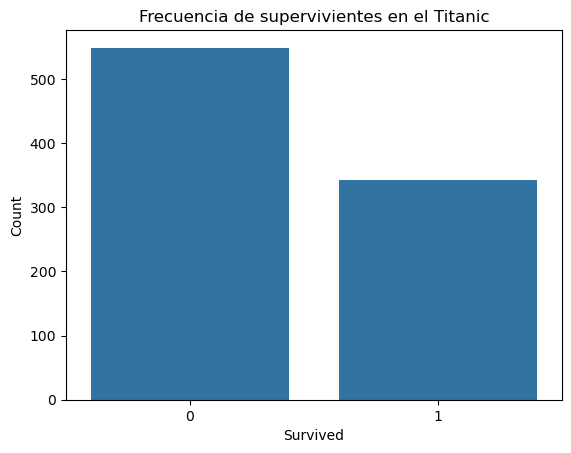

In [659]:

# Gráfico de barras de conteo para la columna 'Survived'
sns.countplot(x='Survived', data=titanic_train)

# Añadir etiquetas y título
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Frecuencia de supervivientes en el Titanic')

Genera un gráfico por sectores donde representes la proporción de supervivientes / fallecidos entre el pasaje.

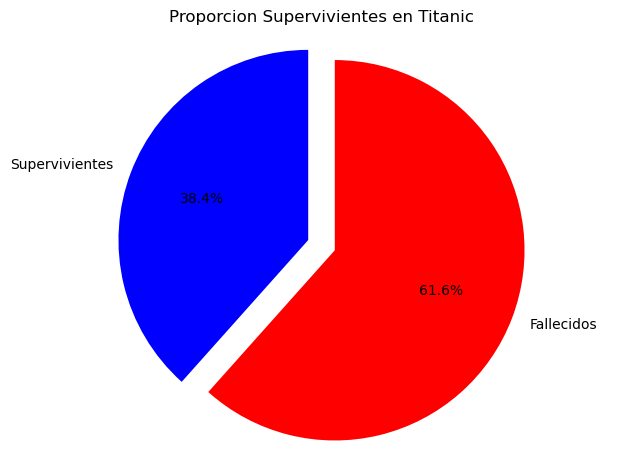

In [660]:
survivors = titanic_train['Survived'].sum()
deceased  = titanic_train.shape[0] - survivors

proportions = [survivors, deceased]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Supervivientes', 'Fallecidos'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Proporcion Supervivientes en Titanic")

# View the plot
plt.tight_layout()
plt.show()

#### Distribución de variables numéricas:
* Identifica las columnas numericas.
* Muestra información estadística de esas variables numéricas.
* Representa su distribución con histogramas, *stripplots*, diagramas de cajas o de violín. (Elige con la información que tienes que tipo de gráfica te dará más información)

¿Las variables tienen una distribución normal o están sesgadas?
¿Existen valores extremos (outliers)?

In [661]:
columnas_numericas = titanic_train.columns[titanic_train.dtypes != "object"]
titanic_train[columnas_numericas].describe() # puede ser que el 512 sea una anomalía en el max Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

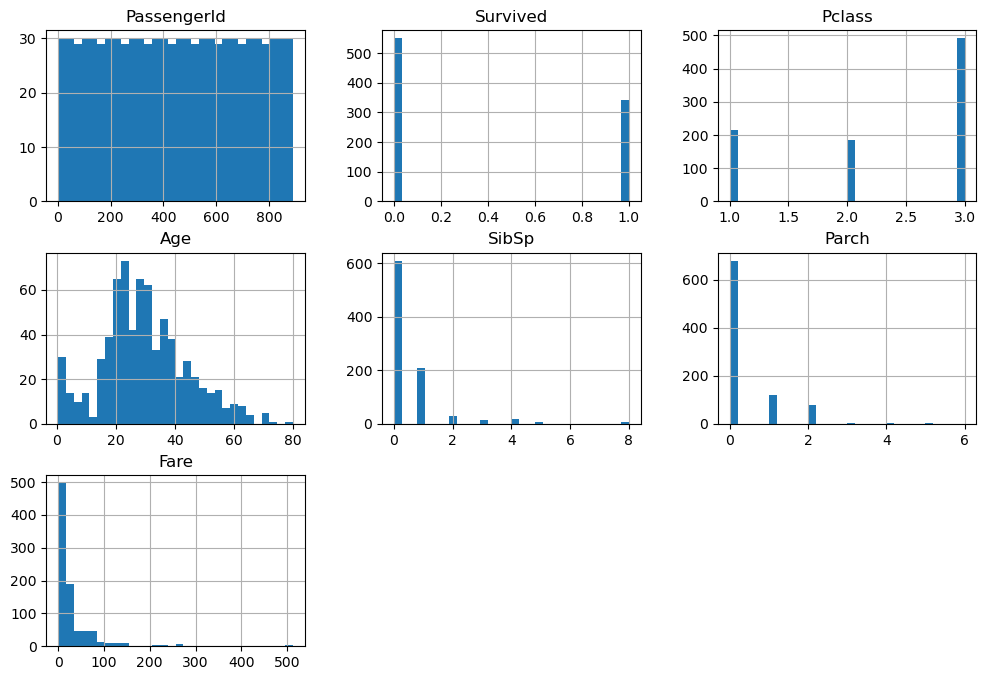

In [662]:
titanic_train[columnas_numericas].hist(bins=30, figsize=(12, 8))

#### Distribución de variables categóricas:
* Identifica las columnas numericas.
* Muestra información de esas variables numéricas.
    * ¿qué valores pueden tomar?
    * ¿cuál es la clase dominante? ¿Con qué frecuencia?
* Representa su distribución con *barplots* o *counterplots*  (Elige con la información que tienes qué variables tiene sentido representar)

In [663]:
columnas_categoricas = titanic_train.columns[titanic_train.dtypes == "object"]

In [664]:
titanic_train[columnas_categoricas].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


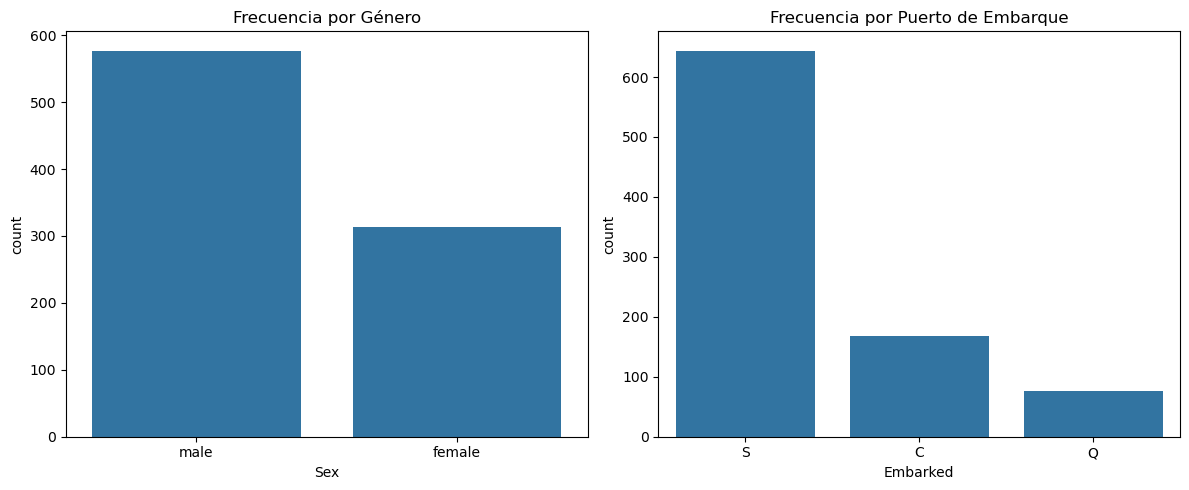

In [665]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para 'Sex'
sns.countplot(x='Sex', data=titanic_train, ax=axes[0])
axes[0].set_title('Frecuencia por Género')

# Gráfico para 'Embarked'
sns.countplot(x='Embarked', data=titanic_train, ax=axes[1])
axes[1].set_title('Frecuencia por Puerto de Embarque')

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()

#### Relaciones entre variables
Examina las correlaciones entre las variables numéricas (Fare, Age, SibSp, Parch), utilizando una matriz de correlación y un heatmap.

<Axes: >

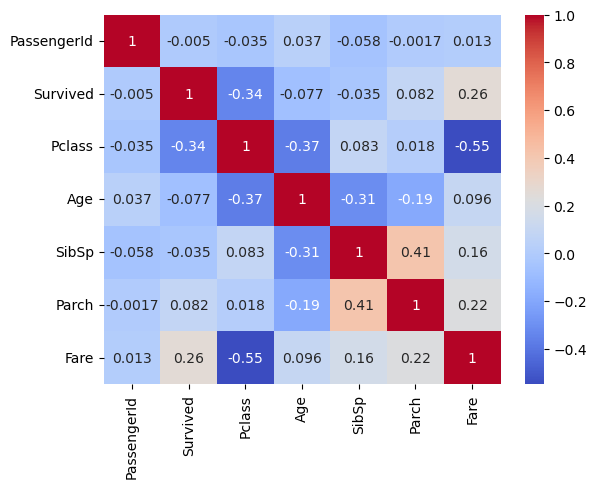

In [666]:
sns.heatmap(titanic_train[columnas_numericas].corr(), annot=True, cmap="coolwarm")

Relaciona las características y la variable objetivo: Analiza cómo las características afectan la supervivencia.
* Repite el diagrama de barras
```python 
# Gráfico de barras de conteo para la columna 'Survived'
sns.countplot(x='Survived', data=titanic_train)
```
Añadiendo el argumento `hue='Sex'` para ver como esán relacionadas

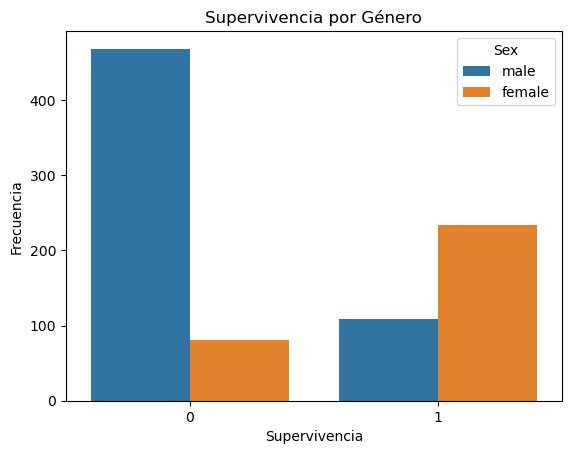

In [667]:
# Gráfico de frecuencia de 'Sex' separado por 'Survived'
sns.countplot(x='Survived', hue='Sex', data=titanic_train)
plt.title('Supervivencia por Género')
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.show()

* Agrupa los datos por clase *Pclass* y calcula la media de la columna *Survived* en cada grupo.

In [668]:
# Agrupar por 'Pclass' y calcular la media de 'Survived'
supervivencia_por_clase = titanic_train.groupby('Pclass')['Survived'].mean()
supervivencia_por_clase

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

* Crear un *violinplot* o un *boxplot* para comparar la distribución de edad entre los supervivientes y no supervivientes

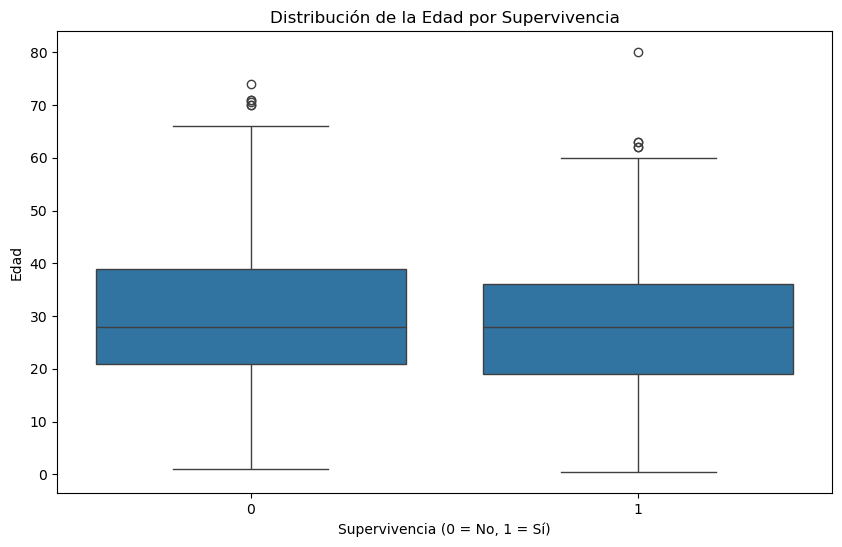

In [669]:
# Crear un violin plot para comparar la distribución de edad entre los sobrevivientes y no sobrevivientes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_train)

# Añadir título y etiquetas
plt.title('Distribución de la Edad por Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

* Estudia la supervivencia según el puerto de embarque. Puedes usar la media por grupo o un diagrama de barras distinguiendo por embarque.

In [670]:
# Agrupar por 'Embarked' y calcular la media de 'Survived'
supervivencia_por_puerto = titanic_train.groupby('Embarked')['Survived'].mean()
print(supervivencia_por_puerto)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Estudiaremos ahora la relación entre el puerto de embarque y la sección del barco en que estaba alojado cada pasajero.
Primero vamos a extraer la letra inicial de la columna Cabin para representar la sección del barco, ya que las letras indican diferentes áreas del barco.
Después creamos una tabla para ver la distribución de los pasajeros por puerto de embarque y la sección del barco. Para no modificar el *DataFrame* original, elimino la columna creada.

In [671]:
# Extraer la letra inicial de la cabina
titanic_train['Cabin_Section'] = titanic_train['Cabin'].str[0]

# Tabla de contingencia entre Embarked y Cabin_Section
table = pd.crosstab(titanic_train['Embarked'], titanic_train['Cabin_Section'])
print(table)
titanic_train.drop(['Cabin_Section'],axis=1,inplace=True)

Cabin_Section  A   B   C   D   E   F  G  T
Embarked                                  
C              7  22  21  13   5   1  0  0
Q              0   0   2   0   1   1  0  0
S              8  23  36  20  26  11  4  1


# Preparación de las variables de entrada al modelo.

Después de esta primera inspección podemos hacernos una serie de preguntas:
- ¿Son todas las variables necesarias para el análisis que queremos hacer?
- ¿Deberíamos modificar la información que nos dan?
- ¿Hay valores anómalos que puedan estropear los cálculos?
- ¿Debería crear nuevas variables a partir de las existentes?

### Entrenando el modelo.

El propósito de este análisis es determinar si existe algún patrón que podamos encontrar a la hora de determinar los factores más relevantes en la supervivencia o no de los pasajeros del Titanic.

Para ello vamos a mantener el *DataFrame* *titanic_train* como está pero vamos a generar uno nuevo que iremos modificando antes de emplearlo para entrenar el modelo.
Tendrás que decidir qué hacer con algunas columnas: ¿eliminarlas?, ¿mantenerlas?, ¿modificarlas? y finalmente tus decisiones influirán en cómo de bien predice el modelo. 

El modelo que vamos a emplear para clasificar entre *Supervivientes* o *Fallecidos* será un **Random Forest**. Ya veremos más adelante en qué consiste.

Lo primero que haremos será copiar el *DataFrame* *titanic_train* en otro de nombre *titanic_intro*. 
Visualizaremos informacion en *titanic_train* y los cambios que decidas hacer se reflejarán en *titanic_intro* 

In [672]:
titanic_intro=titanic_train.copy()

#### Columna *PassengerId*

Si estudiamos por columnas la primera que nos encontramos es *PassengerId*. A priori esta columna es innecesaria ya que no es más que un contador que ya tenemos en los indices por defecto (con la particularidad de que los índices empiezan en 0 como es habitual en python). 

Convierte la columna *PassengerId* en el índice del *DataFrame* *titanic_intro*. (Aquí no puedes elegir)

In [673]:
titanic_intro = titanic_intro.set_index('PassengerId')
titanic_intro.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Columna *Name*

Contiene una cadena de texto que identifica de forma unívoca identifica a los pasajeros. En ese sentido hace la misma función que el *PassengerId*. Vamos a imprimir unos cuantos una vez ordenados alfabeticamente.

Imprime los 10 primeros nombres de pasajeros del *DataFrame* *titanic_train* ordenados alfabéticamente.

In [674]:
titanic_train['Name'].head(10).sort_values()

4                             Allen, Mr. William Henry
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
2                               Heikkinen, Miss. Laina
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
6                              McCarthy, Mr. Timothy J
5                                     Moran, Mr. James
9                  Nasser, Mrs. Nicholas (Adele Achem)
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

Ahora decide si eliminas o no la columna *Name* del *DataFrame* *titanic_intro* para el posterior análisis. Si quieres eliminarla hazlo en la celda siguiente.

In [675]:
titanic_intro = titanic_intro.drop(['Name'],axis=1)
titanic_intro.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#### Columna *Ticket*

Imprime información de la variable *Ticket*. ¿De qué tipo es? ¿Te parece relevante? ¿Hay algún tipo de información que se pueda extraer?
Escribe los primeros 10 valores. Hay algunos numéricos y otros que empiezan por letras. Imprime los que empiezan por letra.

Para filtrar los que empiezan por letra puedes usar:
```python
# Filtrar aquellos tickets que empiezan con una letra
tickets_con_letra = titanic_train[titanic_train['Ticket'].str[0].str.isalpha()]

# Mostrar los resultados
print(tickets_con_letra[['Ticket']])
```


In [676]:
# Informacion de Ticket
titanic_intro["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [677]:
# Extrae los primeros 10 registros
print(titanic_intro[['Ticket']].head(10))

                       Ticket
PassengerId                  
1                   A/5 21171
2                    PC 17599
3            STON/O2. 3101282
4                      113803
5                      373450
6                      330877
7                       17463
8                      349909
9                      347742
10                     237736


In [678]:
# Filtrar aquellos tickets que empiezan con una letra
tickets_con_letra = titanic_train[titanic_train['Ticket'].str[0].str.isalpha()]
# Mostrar los resultados
print(tickets_con_letra[['Ticket']])

               Ticket
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
10            PP 9549
12          A/5. 2151
..                ...
867          PC 17590
874         P/PP 3381
883  C.A./SOTON 34068
884   SOTON/OQ 392076
888        W./C. 6607

[230 rows x 1 columns]


Ahora decide si eliminas o no la columna *Ticket* del *DataFrame* *titanic_intro* para el posterior análisis. Si quieres eliminarla hazlo en la celda siguiente.

In [679]:
titanic_intro  = titanic_intro.drop(["Ticket"],axis=1)
titanic_intro.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


#### Columna *Cabin*

Imprime información de la variable *Cabin* camarote. ¿De qué tipo es? ¿Te parece relevante? ¿Hay algún tipo de información que se pueda extraer?

In [680]:
titanic_intro["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Habrás detectado que falta esa columna para la mayoría de los pasajeros. Vamos a generar un índice lógico para seleccionar aquellos pasajeros que **si** tienen información de su camarote.

In [681]:
pasajeros_con_cabina = titanic_intro["Cabin"].notnull()
print(pasajeros_con_cabina)
pasajeros_con_cabina.sum()

PassengerId
1      False
2       True
3      False
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Cabin, Length: 891, dtype: bool


204

Vemos que el identificador de cabina tiene una letra que sugiere una división de los camarotes por zonas dentro del barco. Quizá podamos usar la información disponible para detectar mayor mortalidad o supervivencia de ciertas secciones del Titanic.
Ahora te toca elegir. Hay dos posibilidades:
* Si no crees que la columna *Cabin* aporta suficiente valor predictivo debido a la alta cantidad de valores faltantes, podrías eliminarla del conjunto de datos *titanic_intro*.

* Si decides mantener la columna, necesitarás lidiar con los valores faltantes.Puedes rellenar los valores faltantes con una nueva categoría como 'Desconocido', lo que indicaría que no se tiene información sobre la cabina. Esto permite que el modelo aprenda si la falta de información tiene algún impacto.

Si has decidido eliminarla hazlo en la celda de abajo y saltate las siguientes celdas hasta llegar a la columna *Pclass*.

Si has decidido mantenerla vamos a modificar la información que contiene para que solo almacene la letra del camarote que nos indica la sección del barco en que se encuentra y nos permitirá agrupar a los pasajeros de forma más eficiente. 

*Podrían hacerse más cosas. Si imprimimos los valores únicos en esa columna*
```python
titanic_train['Cabin'].unique()
```
*observamos que algunos pasajeros tienen varios camarotes. Podemos pensar que en el caso de pertenecer a una misma familia solo uno de ellos adquirió los camarotes. Quizá a partir de la variable *Name* podriamos imputar el mismo camarote o al menos la misma sección a los familiares. Pero esto es demasiado complicado para este primer análisis*

Primero extraemos modificamos la columna *Cabin* en *titanic_intro* guardando en ella solo la primera letra de esa columna en *titanic_train*.

In [682]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Por último sustituimos los valores faltantes *NaN* por 'Desconocido'

In [683]:
titanic_intro['Cabin'] = titanic_intro['Cabin'].fillna('Desconocido')

Ahora hay que codificarla de forma numérica para poder usarla en el modelo.
Vamos a usar **One-hot Encoding** que, aunque aumenta el número de columnas, no establece relaciones de orden artificiales.
La forma más sencilla es mediante:
```python 
titanic_intro = pd.get_dummies(titanic_intro, columns=['Cabin'])
```

In [684]:
from sklearn.preprocessing import OneHotEncoder

titanic_intro = pd.get_dummies(titanic_intro,columns=['Cabin'])
titanic_intro.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A10,Cabin_A14,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,female,38.0,1,0,71.2833,C,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,3,female,26.0,0,0,7.9250,S,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,female,35.0,1,0,53.1000,S,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,3,male,35.0,0,0,8.0500,S,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0,3,male,NaN,0,0,8.4583,Q,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,1,male,54.0,0,0,51.8625,S,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0,3,male,2.0,3,1,21.0750,S,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1,3,female,27.0,0,2,11.1333,S,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Columna *Pclass*

La información de *Pclass* está codificada en un entero que puede tomar valores 1, 2, o 3 que hace referencia a primera, segunda o tercera clase. El problema de usar variables numéricas en un modelo de aprendizaje es que, este, puede inferir propiedades de los valores numéricos que no se corresponden con la realidad. Si pensamos en sueldo todos tenemos claro que 1000 euros está más cerca de 1200 euros que de 3800 euros. Sin embargo ¿Podemos establecer una relación de orden entre "melón", "caleidoscopio" y "chiste"?.

¿Es el caso de la clase en el pasaje del Titanic? ¿Deberíamos considerar la variable clase como una variable categórica y codificarla como un objeto?

* Si crees que tal y como está es correcto para a la celda asociada a la columna *Fare*.
* Si crees que es preferible codificarla como un objeto modifica los valores de la columna Pclass sustituyendo '1' por 'Primera', '2' por 'Segunda' y '3' por 'Tercera'. De esta forma la información de la clase será categórica y no numérica y no se crearán relaciones de orden no deseadas. Posteriormente habrá que codificarla usando **One-hot Encoding**

Sustituye los valores '1' por 'Primera', '2' por 'Segunda' y '3' por 'Tercera' usando:

```python
titanic_intro['Pclass'] = titanic_train['Pclass'].replace(to_replace= {1:'Primera' ,2: 'Segunda',3: 'Tercera'})
```
A continuación codifica la nueva columna mediante **One-hot Encoding**
```python 
titanic_intro = pd.get_dummies(titanic_intro, columns=['Pclass'])
```

In [685]:
titanic_intro['Pclass'] = titanic_intro['Pclass'].replace(to_replace= {1:'Primera' ,2: 'Segunda',3: 'Tercera'})

titanic_intro = pd.get_dummies(titanic_intro, columns=['Pclass'])

titanic_intro.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_Primera,Pclass_Segunda,Pclass_Tercera
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,male,22.0,1,0,7.2500,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,female,38.0,1,0,71.2833,C,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,female,26.0,0,0,7.9250,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,female,35.0,1,0,53.1000,S,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0,male,35.0,0,0,8.0500,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,0,male,NaN,0,0,8.4583,Q,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,0,male,54.0,0,0,51.8625,S,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,0,male,2.0,3,1,21.0750,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,1,female,27.0,0,2,11.1333,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Columna *Fare*

Imprime información de la variable *Fare* precio del pasaje en el *DataFrame* *titanic_train*. ¿De qué tipo es? ¿Te parece relevante? ¿Hay algún tipo de información que se pueda extraer?


In [686]:
titanic_intro['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

Representa los datos en la columna *Fare* en un diagramas de cajas *boxplot*. 

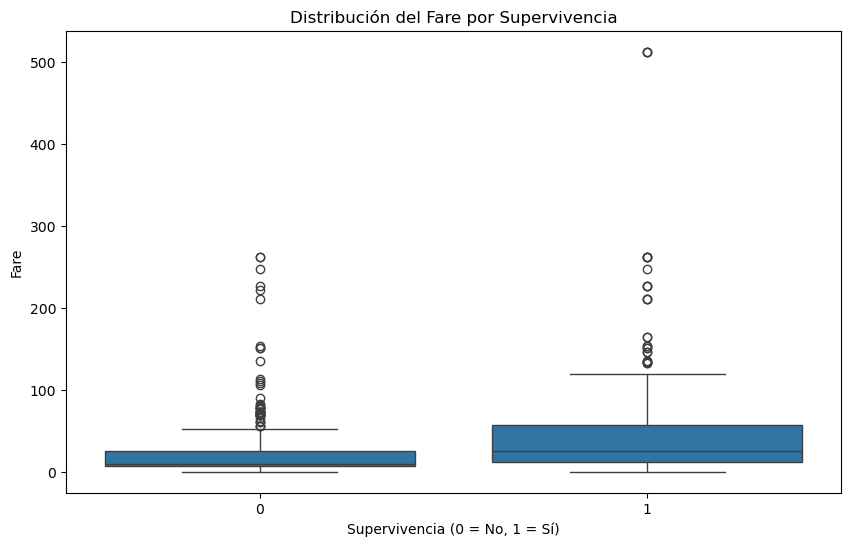

In [687]:
# Crear un violin plot para comparar la distribución de edad entre los sobrevivientes y no sobrevivientes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_train)

# Añadir título y etiquetas
plt.title('Distribución del Fare por Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Fare')

# Mostrar el gráfico
plt.show()

La mediana es 14.45 el primer cuartil Q1 es 7.91 y el tercer cuartil Q3 es 31.0. Por tanto el rango intercuartil es:

$$ \text{IQR} = \text{Q3}-\text{Q1} = 23.09.$$

Asi que vamos a considerar atípicos los valores que estén alejados de Q1 (por debajo) y Q3 (por encima) una distancia mayor que $1.5  \times \text{IQR}$ . 
En el rango inferior no hay valores atípicos. En el rango superior consideraremos atípicos todos los valores mayores que:
$$ \text{Q3} +1.5  \times
  \text{IQR} = 65.63.$$

¿Qué hacemos con estos datos anómalos?
Una vez más tienes dos opciones:

* Nada. El modelo de aprendizaje automático que vamos a emplear, **Random Forest**, se basa en **Árboles de decisión** y estos son poco sensibles a los *Outliers*. Así que dejamos el *DataFrame* como está y pasamos a la celda correspondiente a la edad *Age*.

* Escalarlos. Aunque estos modelos son más robustos frente a outliers que otros métodos, sin embargo, sigue siendo recomendable tratar los valores atípicos para evitar efectos no deseados. Usaremos un RobustScaler porque es resistente a los valores atípicos y permitirá que Fare sea tratado adecuadamente en el modelo.


Si tu opción es escalarlos simplemente ejecuta la siguiente celda

In [688]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
titanic_intro['Fare'] = scaler.fit_transform(titanic_train[['Fare']])
titanic_intro

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_Primera,Pclass_Segunda,Pclass_Tercera
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,male,22.0,1,0,-0.312011,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,female,38.0,1,0,2.461242,C,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,female,26.0,0,0,-0.282777,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,female,35.0,1,0,1.673732,S,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0,male,35.0,0,0,-0.277363,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,male,27.0,0,0,-0.062981,S,False,False,False,...,False,False,False,False,False,False,False,False,True,False
888,1,female,19.0,0,0,0.673281,S,False,False,False,...,False,False,False,False,False,False,False,True,False,False
889,0,female,NaN,1,2,0.389604,S,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Columna *Age*

Recuerda la información obtenida de la variable *Age* edad en el *DataFrame* *titanic_train*. ¿De qué tipo es? ¿Te parece relevante? ¿Tiene datos faltantes? ¿anómalos?

In [689]:
titanic_train["Age"].value_counts

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

Cuando inspeccionamos por primera vez los datos destacamos que la columna *Age*, con la edad de cada pasajero, tenía 714 registros y por tanto de 177 pasajeros se desconoce su edad.

¿Qué hacer con los valores nulos *NaN*?
Hay diferentes alternativas, en ocasiones podemos obviarlos eliminando el registro completo.
También podemos darles un valor de compromiso, la media o la mediana de los datos conocidos si son numéricos, o crear una categoría nueva *Desconocido* si la variable en cuestión es categórica.
Podemos incluso separar los datos en dos conjuntos sobre los que hacer análisis de forma independiente.

¿Que vamos a hacer con la columna *Age*?
De nuevo dos opciones:
* Eliminarla. Cuando vimos la relación entre la supervivencia y la edad vimos que la distribución de las edades entre los supervivientes era muy similar a la de los fallecidos. Parece ser que en este caso no aplicó lo de *los niños primero*. Como no parece relevante la elimino de mi análisis y un problema menos. Si esta es tu elección elimina la columna *Age* edad de *titanic_intro* y después salta a la celda *Sex*.

* Imputar algún valor a los datos faltantes y mantenerla en el análisis. Puede haber relaciones entre variables que se me estén escapando y no voy a perder la información de la edad. Si está es tu decisión sigue con las celdas siguientes.

Veamos la distribución de edades en el *DataFrame* *titanic_train* mediante un histograma.

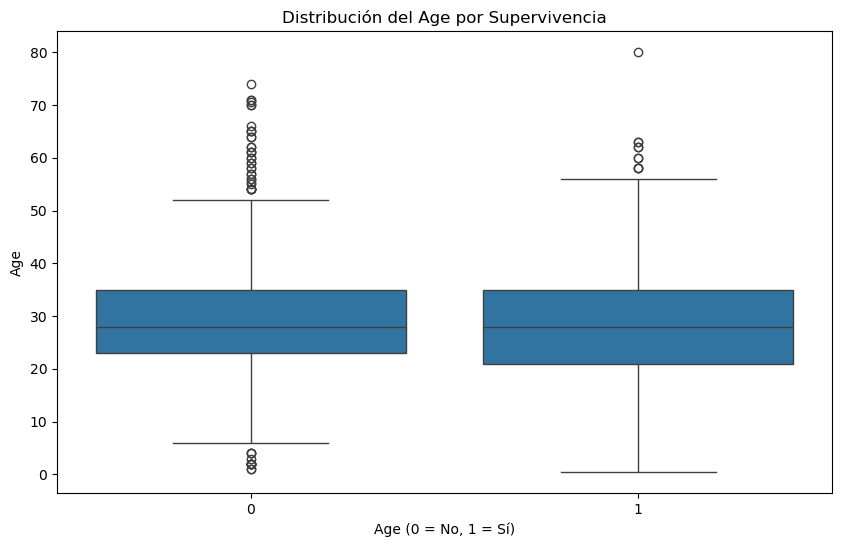

In [690]:
titanic_median_age = titanic_intro["Age"].median()
titanic_intro['Age'] = titanic_intro['Age'].fillna(titanic_median_age)

# Crear un violin plot para comparar la distribución de edad entre los sobrevivientes y no sobrevivientes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_intro)

# Añadir título y etiquetas
plt.title('Distribución del Age por Supervivencia')
plt.xlabel('Age (0 = No, 1 = Sí)')
plt.ylabel('Age')

# Mostrar el gráfico
plt.show()

La elección de cómo imputar los valores faltantes en la columna *Age* del conjunto de datos del Titanic depende de la distribución de los datos y del impacto que los valores atípicos.
* Si la distribución tiene una alta asimetría o outliers (como personas muy jóvenes o ancianas en el Titanic), la media puede verse afectada por estos valores extremos, lo que podría hacer que el valor imputado no sea representativo de la mayoría de los datos.
* La mediana es más robusta frente a los valores atípicos y es una mejor opción si la distribución es asimétrica o tiene outliers. La mediana divide los datos en dos mitades, por lo que no se ve afectada por valores extremadamente altos o bajos.

Usaremos la mediana.

#### Columna *Sex*

Recuerda la información obtenida de la variable *Sex* edad en el *DataFrame* *titanic_train*. ¿De qué tipo es? ¿Te parece relevante? ¿Tiene datos faltantes? ¿anómalos?

Esta columna no tiene discusión posible. Hemos visto que es muy relevante en la clasificación así que la mantenemos.
Lo único necesario es modificarla para cambiar los valores que almacena y convertirlos en enteros. 

In [691]:
titanic_intro["Sex"].value_counts
sex_na = titanic_intro["Sex"].isna()
sex_na.sum()
titanic_intro['Sex'] = titanic_intro['Sex'].map({'male': 0, 'female': 1})



#### Columnas *Parch* y *SibSp*

El fichero del Titanic contiene información del número de hermanos, marido o esposa en la columna *SibSp* y la de progenitores y descendientes en *Parch*
Por curiosidad veamos aquellos pasajeros con más familiares a bordo.


In [692]:
max_familiares = max(titanic_train['Parch']+titanic_train['SibSp'])
titanic_train[titanic_train['Parch']+titanic_train['SibSp']==max_familiares]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Una familia de al menos 10 miembros (solo muestra 7 pero si sumamos SibSp + Parch tenemos 10) de la que en el conjunto de datos de test tenemos 7 probablemente hermanos. 
Todos ellos iban en tercera clase aunque el precio pagado por el pasaje está por encima del valor que delimita los valores atípicos 65.63 ¿Hay algo más que te llame la atención de estos pasajeros?

Para estas dos variables hay dos posibilidades de nuevo:
* Dejarlas tal cual. Por lo visto en el ejemplo anterior tiene pinta de que existe relación entre el valor de esas columnas y la supervivencia. Si esa es tu elección pasa a las celdas correspondientes a *Embarked*

* Combinar esas dos columnas en una única de nombre *Family* que indique cuantos familiares tenía a bordo cada pasajero. La información del número de hermanos, marido o esposa que contiene *SibSp* y la de progenitores y descendientes *Parch* resulta por separado poco relevante. Quiza si pudiesemos discernir entre progenitores y descendientes podriamos aproximar la edad de un pasajero donde falte esa información (si el padre de un pasajero está a bordo y tiene 35 años es probable que el pasajero tenga menos de 10). Pero no es el caso. Si esta es tu elección trabaja en las celdas siguientes.

Crea una nueva columna en *titanic_intro* donde sumes el valor de *SibSp* y *Parch*

Elimina las columnas *SibSp* y *Parch* de *titanic_intro*

#### Columna *Embarked*

Recuerda la información obtenida de la variable *Embarked* edad en el *DataFrame* *titanic_train*. ¿De qué tipo es? ¿Te parece relevante? ¿Tiene datos faltantes? ¿anómalos?

De nuevo dos posibilidades para esta columna:

* Eliminarla. No parece aportar gran cosa saber el puerto en que embarcaron. Si esta es tu opción usa la celda siguiente para eliminar la columna de *titanic_intro*.

* Mantenerla. Si decides mantenerla deberás codificarla usando **One-Hot Encoding**. Usa la siguiente celda para codificarla en *titanic_intro*

In [693]:
titanic_intro['Embarked'] = titanic_intro['Embarked'].replace(to_replace= {1:'C' ,2: 'Q',3: 'S'})

titanic_intro = pd.get_dummies(titanic_intro, columns=['Embarked'])

titanic_intro.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_Primera,Pclass_Segunda,Pclass_Tercera,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,22.0,1,0,-0.312011,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,1,1,38.0,1,0,2.461242,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1,1,26.0,0,0,-0.282777,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,1,1,35.0,1,0,1.673732,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
5,0,0,35.0,0,0,-0.277363,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
6,0,0,28.0,0,0,-0.259680,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7,0,0,54.0,0,0,1.620136,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
8,0,0,2.0,3,1,0.286744,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
9,1,1,27.0,0,2,-0.143827,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### Prueba del Modelo.

Hasta aquí las modificaciones sobre los datos de entrada. Vamos a ver cómo se comporta el modelo frente a los datos que le proporcionamos.


In [694]:
#import necessary libraries for the program
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [695]:
#Divide the dataset into features and target variables
X=titanic_intro.iloc[:,1:]
Y=titanic_intro['Survived'].ravel()

#Divide the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [696]:
#Fit the training data into the Random Forest Classifier
model=RandomForestClassifier().fit(X_train, Y_train)
predict = model.predict(X_test)

In [697]:
print("Efficiency is :")
print(accuracy_score(predict, Y_test)*100) 

Efficiency is :
82.51121076233184
